In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import Models for training
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Import Evaluation Metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("dataset_heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()
# 1 is female
# 0 is male

target
1    165
0    138
Name: count, dtype: int64

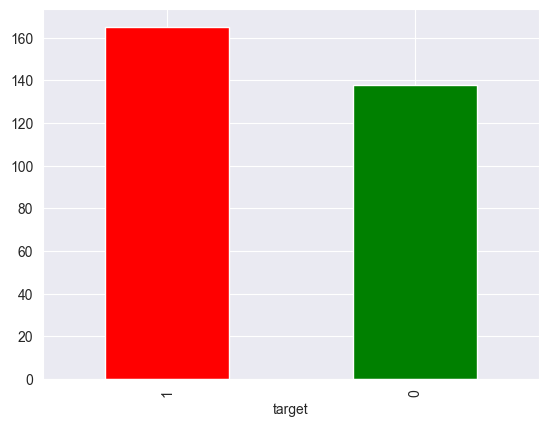

In [6]:
df['target'].value_counts().plot(kind = 'bar', color = ['red','green']);

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Checking Statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
# checking how many male and female have disease
pd.crosstab(df.target,df.sex)

# 0 in target is not having disease
# 1 is having disease

sex,0,1
target,,
0,24,114
1,72,93


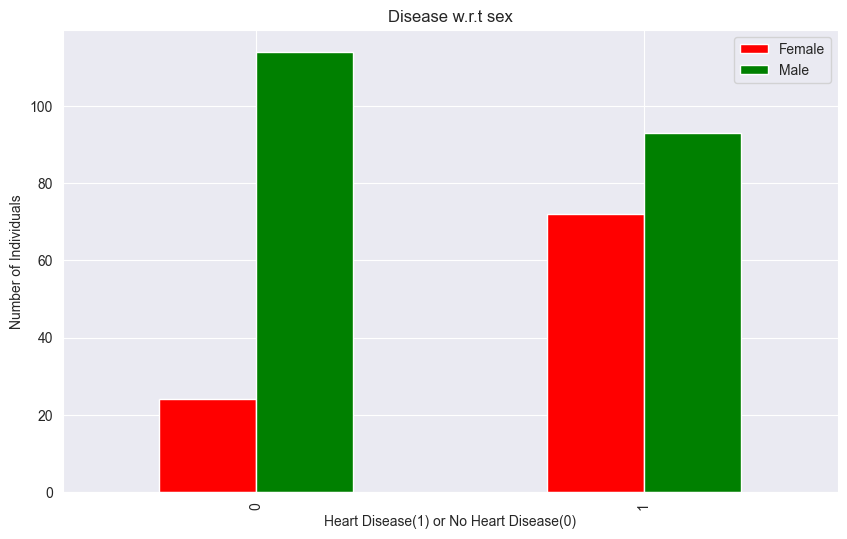

In [11]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize = (10,6), color = ['red','green'])
plt.title("Disease w.r.t sex")
plt.xlabel("Heart Disease(1) or No Heart Disease(0)")
plt.ylabel("Number of Individuals")
plt.legend(['Female','Male'])

In [12]:
# thalach = maximum heart rate
print(df.thalach)

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

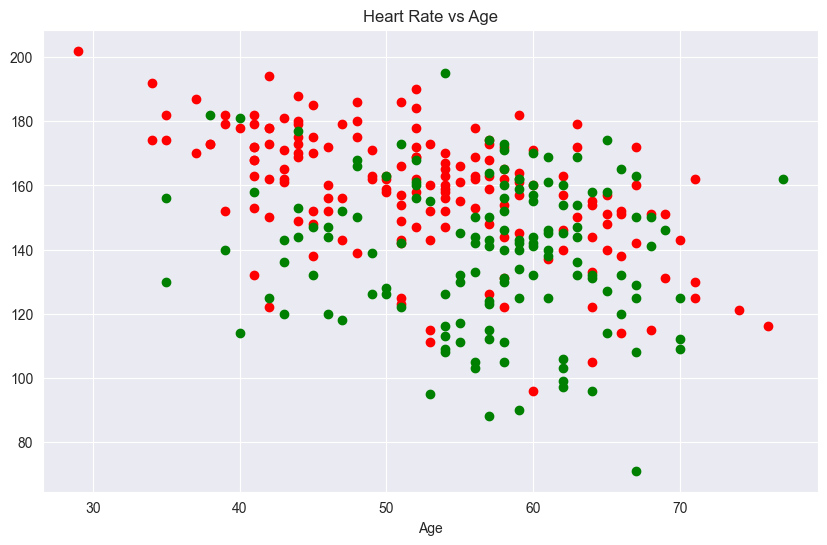

In [13]:
# Finding Pattern Using Scatter Plot
plt.figure(figsize=(10,6))
# Plot for people who have heart Disease 
plt.scatter(df.age[df.target == 1], df.thalach[df.target==1], color = ['red'])
# Plot for people who don't have heart Disease
plt.scatter(df.age[df.target == 0], df.thalach[df.target==0], color = ['green'])

plt.title("Heart Rate vs Age")
plt.xlabel("Age")
plt.ylabel

<Axes: ylabel='Frequency'>

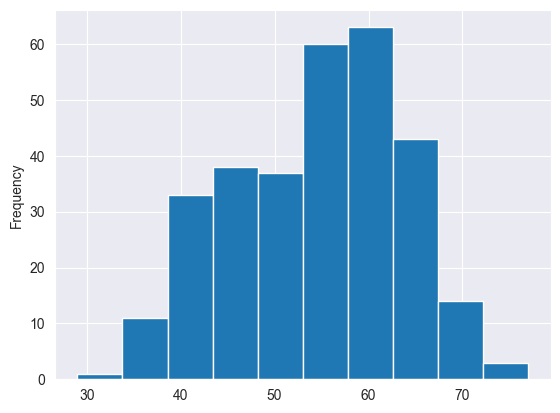

In [14]:
# Age Distribution 
df.age.plot.hist()

In [15]:
# Chest Pain and their Types
df.cp

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

cp: chest pain type

    -- Value 0: typical angina: chest pain due to decrease blood pressure.
    
    -- Value 1: atypical angina: Cheast pain not related to Heart Problem
    
    -- Value 2: non-anginal pain: Not Heart Related
    
    -- Value 3: asymptomatic: chest pain not showing Heart Problem

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


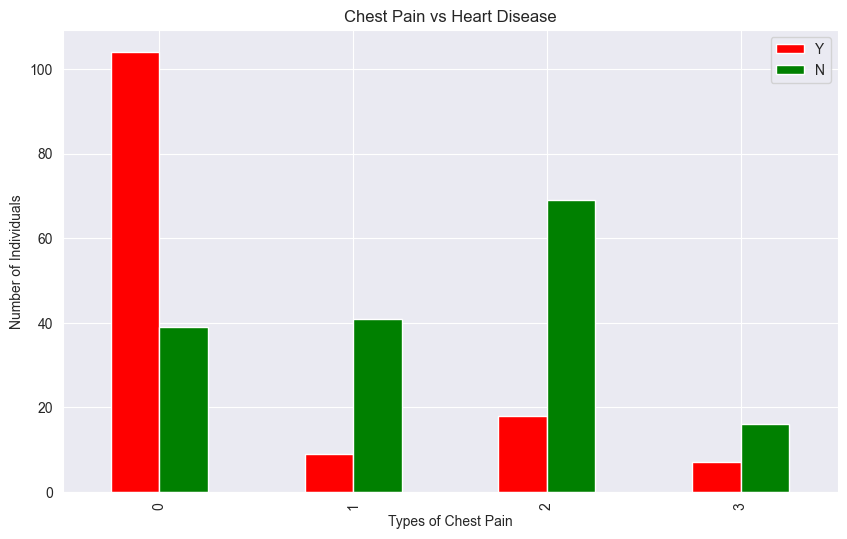

In [17]:
# Relation between Chest Pain and Heart Disease
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (10,6), color = ['red','green'])
plt.title("Chest Pain vs Heart Disease")
plt.xlabel("Types of Chest Pain")
plt.ylabel("Number of Individuals")
plt.legend(['Y','N'])

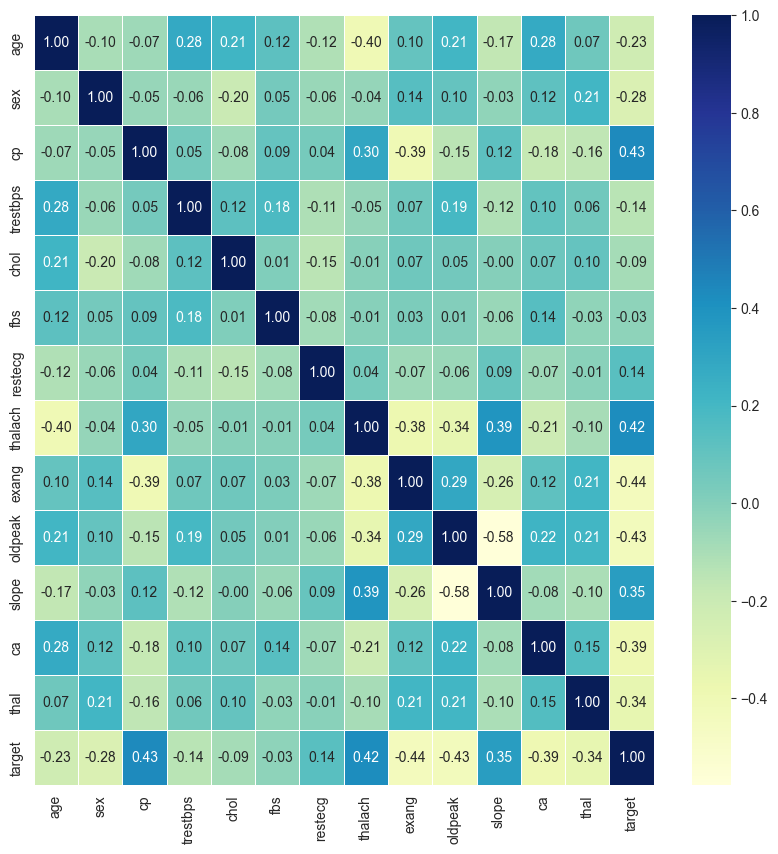

In [18]:
# Correlation Matrix
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,annot=True,linewidths=0.5,fmt='0.2f',cmap='YlGnBu'); # fmt: value after point two

In [19]:
# Now training the model
X = df.drop('target', axis=1)
Y = df['target']

In [20]:
X
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
# using Random seed, so that others could produce the same result
np.random.seed(7)
# Split into test and train 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [22]:
# Now fitting into the models 
models = {'LR': LogisticRegression(),'Random Forest':RandomForestClassifier(),'KNN':KNeighborsClassifier(), 'SVM' : SVC()}
# fit_and score is a function for fitting the data into the models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    # Make a dictionary to score the model
    model_score = {}
    # Looping through
    for name,model in models.items():
        model.fit(x_train,y_train)
        # Evaluate the model and append it score
        model_score[name] = model.score(x_test,y_test)*100
    return model_score   

In [23]:
model_scores = fit_and_score(models,x_train,x_test, y_train,y_test)
model_scores

C:\Users\badve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 73.77049180327869,
 'Random Forest': 72.1311475409836,
 'KNN': 55.73770491803278,
 'SVM': 62.295081967213115}

 Accuracies of Each Model:
 * Logistic Regression: 73.77
 * Random Forest: 72.13
 * KNN: 55.73
 * SVM: 62.29

<H1>HyperParameter Tuning Ways </H1>
<ul>
  <li>Grid Search</li>
  <li>Random Search</li>
</ul>

<H3> First let us use Random Search for Hypertuning the models

In [24]:
# Define hyperparameter distribution
LR_hp = {'C': np.logspace(-4,4,20), 'solver': ['liblinear']}
RFC_hp = {
    'n_estimators': [100, 300, 500],    # Limited to 3 options
    'max_depth': [None, 5, 10],         # Key values for tree depth
    'min_samples_split': [2, 10],       # Simplified with fewer values
    'min_samples_leaf': [1, 5]          # Common choices
}


svm_hp = {
    'C': np.logspace(-3, 3, 10),           # C from 0.001 to 1000
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel options
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Gamma values
    'degree': [2, 3, 4]                    # Polynomial degree
}
knn_hp = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [25]:
# To first apply this for Logistic Regression 
# Apply random seed first
np.random.seed(7)

# Applying RSCV to LR
lr_rscv = RandomizedSearchCV(LogisticRegression(),param_distributions=LR_hp,cv=15,n_iter=20,verbose=True)
# Model fitting 
lr_rscv.fit(x_train,y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits


RandomizedSearchCV(cv=15, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
a1 = lr_rscv.score(x_test,y_test)*100
a1

75.40983606557377

In [27]:
lr_rscv.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [28]:
# Now apply the same thing to RFC
# Apply random seed first
np.random.seed(7)

# Applying RSCV to RFC
rfc_rscv = RandomizedSearchCV(RandomForestClassifier(),param_distributions=RFC_hp,cv=5,n_iter=20,verbose=True)
# Model fitting 
rfc_rscv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 5],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [100, 300, 500]},
                   verbose=True)

In [29]:
a2 =rfc_rscv.score(x_test,y_test)*100
a2

73.77049180327869

In [30]:
rfc_rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [31]:
# Initialize SVM
svm = SVC()

# Randomized Search
svm_rscv = RandomizedSearchCV(estimator=svm,
                                   param_distributions=svm_hp, 
                                   n_iter=20,        # Number of random combinations
                                   cv=5,             # 5-fold cross-validation
                                   scoring='accuracy',
                                   verbose=2, 
                                   random_state=42)
svm_rscv.fit(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .......C=1000.0, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=1000.0, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=1000.0, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=1000.0, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=1000.0, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=1000.0, degree=4, gamma=0.1, kernel=linear; total time=   3.9s
[CV] END .......C=1000.0, degree=4, gamma=0.1, kernel=linear; total time=   1.5s
[CV] END .......C=1000.0, degree=4, gamma=0.1, kernel=linear; total time=   4.2s
[CV] END .......C=1000.0, degree=4, gamma=0.1, kernel=linear; total time=   7.8s
[CV] END .......C=1000.0, degree=4, gamma=0.1, kernel=linear; total time=   1.4s
[CV] END C=0.021544346900318832, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.021544346900318832, degree=3,

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.01, 0.1,
                                                  1],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy', verbose=2)

In [32]:
a3 = svm_rscv.best_score_*100
a3

73.71794871794873

In [33]:
svm_rscv.best_params_

{'kernel': 'linear', 'gamma': 1, 'degree': 3, 'C': 0.021544346900318832}

In [34]:
knn = KNeighborsClassifier()
# Apply GridSearchCV
knn_rscv = RandomizedSearchCV(estimator=knn, param_distributions=knn_hp, n_iter=10,scoring='accuracy', cv=5,random_state=42, verbose=1)
knn_rscv.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=1)

In [35]:
knn_rscv.best_params_

{'weights': 'uniform', 'n_neighbors': 5, 'metric': 'manhattan'}

In [36]:
a4 = knn_rscv.best_score_* 100
a4

70.63775510204081

<H3> Now use Grid Search for hypertuning </H3>

In [37]:
# To first apply this for Logistic Regression 
# Apply random seed first
np.random.seed(7)

# Applying GSCV to LR
lr_gscv = GridSearchCV(LogisticRegression(),param_grid=LR_hp,cv=5,verbose=True)
# Model fitting 
lr_gscv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
b1 = lr_gscv.score(x_test,y_test)*100
b1

75.40983606557377

In [39]:
lr_gscv.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [40]:
# Now apply the same thing to RFC
# Apply random seed first
np.random.seed(7)

# Applying GSCV to RFC
rfc_gscv = GridSearchCV(RandomForestClassifier(n_jobs=1),param_grid=RFC_hp,cv=5,verbose=True)
# Model fitting 
rfc_gscv.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=True)

In [41]:
b2 = rfc_gscv.score(x_test,y_test)*100

In [42]:
rfc_gscv.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [57]:
# Now use GSCV for SVM
svm_hp = {
    'C': [0.1, 1, 10],                      # Narrowed regularization parameters
    'kernel': ['linear', 'rbf'],            # Removed 'poly' for simplicity
    'gamma': ['scale', 0.1, 1],             # Focused gamma values
}

svm = SVC()
svm_gscv = GridSearchCV(estimator=svm,
                           param_grid=svm_hp, 
                           cv=5,           # 5-fold cross-validation
                           scoring='accuracy', 
                           verbose=2)
svm_gscv.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [58]:
y_pred = svm_gscv.predict(x_test)

In [51]:
b3 = svm_gscv.best_score_ *100
b3

85.97789115646258

In [45]:
svm_gscv.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [46]:
knn = KNeighborsClassifier()
# Apply GridSearchCV
knn_gscv = GridSearchCV(knn, knn_hp, cv=5, scoring='accuracy')
knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [47]:
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [48]:
b4 = knn_gscv.best_score_ * 100
b4

71.49659863945578

<H3> Accuracies after Improving</H3>
<ul>
  <li>Logistic Regression: 73.77 --> 75.40(RSCV) </li>
  <li>Random Forest: 72.13 --> 70.49(RSCV)</li>
  <li>KNN: 55.73 --> 71.49(GSCV)</li>
  <li>SVM: 62.29 --> 85.97(GSCV)</li>
</ul>

<H5>Since SVM has the highest accuracy we take that</H5>

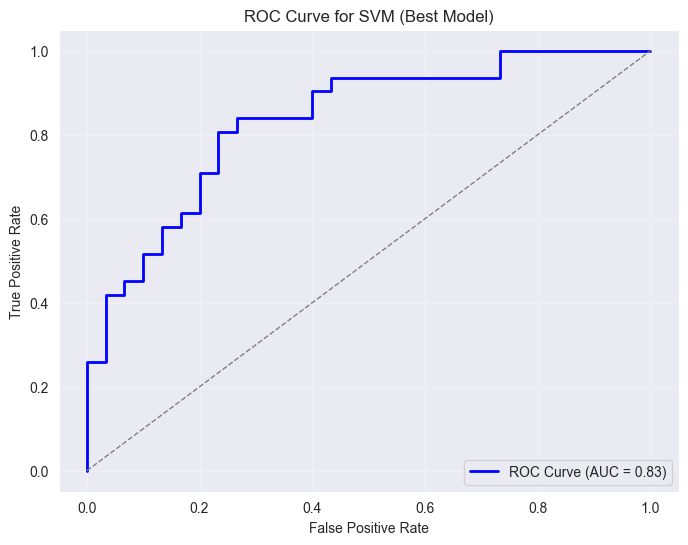

Area Under the Curve (AUC): 0.83


In [61]:
# Get the best estimator from GridSearchCV
best_svm = svm_gscv.best_estimator_

# Predict scores for ROC curve (decision_function is used for SVM)
y_scores = best_svm.decision_function(x_test)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)  # Adjust `pos_label` if needed
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Random guessing baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM (Best Model)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Print AUC score
print(f"Area Under the Curve (AUC): {roc_auc:.2f}")

Confusion Matrix:
[[18 12]
 [ 3 28]]


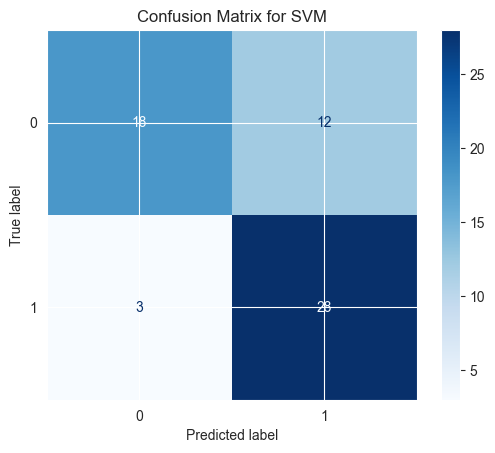

In [65]:
# Get predictions on the test set
y_pred = svm_gscv.predict(x_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_svm.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for SVM")
plt.show()

In [72]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [77]:
precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)

# Print individual metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Accuracy: 75.41%
Precision: 70.00%
Recall: 90.32%
F1-Score: 78.87%
